In [471]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.layers import Rescaling, Resizing, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

from PIL import Image


In [194]:
IMG_SIZE = 30
BAT_SIZE = 32
CHANNELS = 3

In [208]:
train_dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    shuffle = True,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BAT_SIZE
)

Found 39209 files belonging to 43 classes.


In [11]:
test_dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "Test",
    shuffle = True,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BAT_SIZE
)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory Test. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [210]:
classnames = train_dataset.class_names
classnames

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

In [108]:
len(classnames)

43

In [23]:
len(train_dataset)

1226

In [212]:
len(train_dataset) * BAT_SIZE

39232

[12 24  9 19 35 12 42  4 23 40 12 32 38 12  2 23 32 37 26 35  4  3 38  1
  5 40  1  9 27 21 21 18]
30


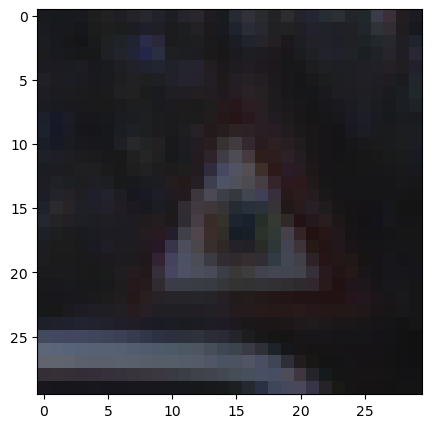

In [214]:
plt.figure(figsize=(5,5))
for img, label in train_dataset.take(1):
    print(label.numpy())
    print(classnames[label[1].numpy()])
    plt.imshow(img[1].numpy().astype('int'))

In [216]:
val_size = 0.8
len(train_dataset) * val_size

980.8000000000001

In [218]:
train_data = train_dataset.take(900)
val_data = train_dataset.skip(900)

In [220]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE )
val_data = val_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [222]:
rescale = tf.keras.Sequential([
    Rescaling(1.0 / 255)
])

In [224]:
data_aug = tf.keras.Sequential([
    RandomFlip('horizontal_and_vertical'),
    RandomRotation(0.2),
    RandomZoom(0.1)
])

In [226]:
no_classes = 43
model = models.Sequential([
    rescale,
    data_aug,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (BAT_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.15),

    layers.Conv2D(128, (3,3), activation='relu'),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(no_classes, activation= 'softmax')
])

model.build(input_shape = (BAT_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS))

C:\Users\moort\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [228]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)      │ (32, 30, 30, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_12 (Sequential)      │ (32, 30, 30, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (32, 28, 28, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (32, 14, 14, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (32, 12, 12, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (32, 4, 4, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (32, 2, 2, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (32, 1, 1, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (32, 1, 1, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 512)              │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 43)               │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,059 (2.07 MB)

 Trainable params: 542,059 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [116]:
history = model.fit(
    train_data, 
    epochs = 30,
    batch_size = BAT_SIZE,
    verbose = 1,
    validation_data = val_data
)

Epoch 1/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.2444 - loss: 2.6450 - val_accuracy: 0.5927 - val_loss: 1.1761
Epoch 2/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 66s 74ms/step - accuracy: 0.6057 - loss: 1.1555 - val_accuracy: 0.7831 - val_loss: 0.6155
Epoch 3/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 66s 73ms/step - accuracy: 0.7776 - loss: 0.6598 - val_accuracy: 0.8957 - val_loss: 0.3256
Epoch 4/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 66s 73ms/step - accuracy: 0.8501 - loss: 0.4461 - val_accuracy: 0.9359 - val_loss: 0.2054
Epoch 5/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 66s 73ms/step - accuracy: 0.8839 - loss: 0.3390 - val_accuracy: 0.9543 - val_loss: 0.1475
Epoch 6/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 65s 72ms/step - accuracy: 0.9054 - loss: 0.2841 - val_accuracy: 0.9602 - val_loss: 0.1330
Epoch 7/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 64s 71ms/step - accuracy: 0.9188 - loss: 0.2458 - val_accuracy: 0.9724 - val_loss: 0.0932
Epoch 8/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 63s 70ms/step - accuracy: 0.9294 - loss: 0.2200 - 

In [120]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 900}

In [128]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [130]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

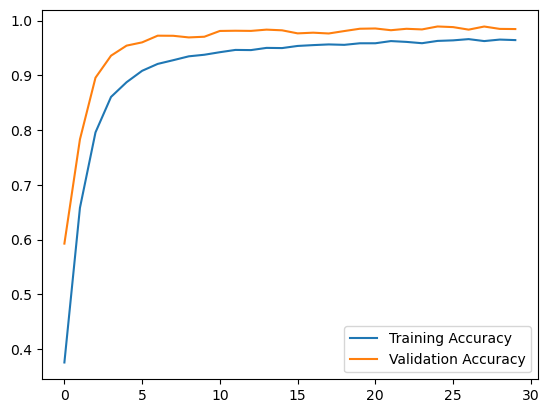

In [132]:
plt.plot(range(30), accuracy, label = 'Training Accuracy')
plt.plot(range(30), val_accuracy, label = 'Validation Accuracy')
plt.legend()
plt.show()

In [134]:
loss = history.history['loss']
val_loss = history.history['val_loss']

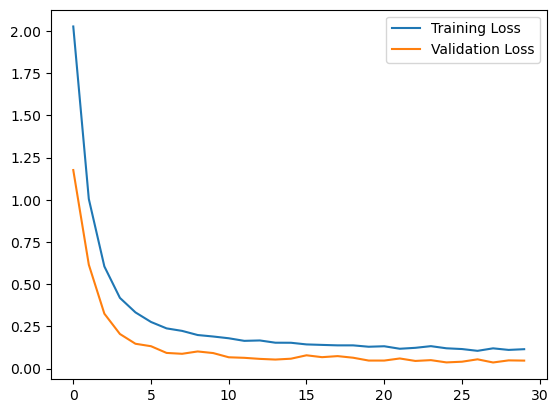

In [136]:
plt.plot(range(30), loss, label = 'Training Loss')
plt.plot(range(30), val_loss, label = 'Validation Loss')
plt.legend()
plt.show()

In [140]:
test_data = pd.read_csv("Test.csv")

In [142]:
test_data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [148]:
labels = test_data['ClassId'].values
imgs = test_data['Path'].values

In [150]:
labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [182]:
print(labels.shape)

(12630,)


In [184]:
data = []

for img in imgs:
    image = Image.open("C:/Users/moort/GUVI-PROJECTS/Traffic_Sign/"+img)
    image = image.resize([53,53])
    data.append(np.array(image))

X_test = np.array(data)

In [186]:
print(X_test.shape)

(12630, 53, 53, 3)


In [188]:
predict = np.argmax(model.predict(X_test), axis=-1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [192]:
print(accuracy_score(labels,predict))

0.05946159936658749


## Model 2

In [359]:
IMG_SIZE = 30
BAT_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [361]:
data = []
labels = []
classes = 43

for label in range(classes):
    path = os.path.join("C:/Users/moort/GUVI-PROJECTS/Traffic_Sign/Train", str(label))
    images = os.listdir(path)

    for img in images:
        image = Image.open(path + "/" + img)
        image =image.resize([30,30])
        image = np.array(image)

        data.append(image)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)


In [363]:
data.shape

(39209, 30, 30, 3)

In [365]:
labels.shape

(39209,)

In [367]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [369]:
X_train.shape

(31367, 30, 30, 3)

In [371]:
y_train.shape

(31367,)

In [373]:
X_test.shape

(7842, 30, 30, 3)

In [375]:
y_test.shape

(7842,)

In [305]:
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

In [377]:
rescale_2 = tf.keras.Sequential([
    Rescaling(1.0 / 255)
])

In [379]:
data_aug_2 = tf.keras.Sequential([
    RandomFlip('horizontal_and_vertical'),
    RandomRotation(0.2),
    RandomZoom(0.1)
])

In [327]:
input_shape = BAT_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS
input_shape

(32, 30, 30, 3)

In [381]:
input_shape = BAT_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS
model = models.Sequential([
    rescale_2,
    data_aug_2,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.15),

    layers.Conv2D(128, (3,3), activation='relu'),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(43, activation= 'softmax')
])

model.build(input_shape = input_shape)

C:\Users\moort\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [383]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_26 (Sequential)      │ (32, 30, 30, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_27 (Sequential)      │ (32, 30, 30, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (32, 28, 28, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (32, 14, 14, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (32, 12, 12, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (32, 4, 4, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (32, 2, 2, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (32, 1, 1, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (32, 1, 1, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (32, 512)              │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (32, 43)               │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,059 (2.07 MB)

 Trainable params: 542,059 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [385]:
model.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [387]:
history = model.fit(
    X_train, y_train,
    epochs = EPOCHS,
    batch_size = BAT_SIZE,
    validation_data = (X_test, y_test)
)

Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.1763 - loss: 2.9293 - val_accuracy: 0.5019 - val_loss: 1.4299
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.5173 - loss: 1.4036 - val_accuracy: 0.6713 - val_loss: 0.9166
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.6429 - loss: 1.0076 - val_accuracy: 0.7388 - val_loss: 0.7214
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7101 - loss: 0.8261 - val_accuracy: 0.8083 - val_loss: 0.5368
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.7548 - loss: 0.6947 - val_accuracy: 0.8488 - val_loss: 0.4276
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7893 - loss: 0.6054 - val_accuracy: 0.8736 - val_loss: 0.3864
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8234 - loss: 0.5128 - val_accuracy: 0.8940 - val_loss: 0.3092
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8316 - loss: 0.4867 - 

In [389]:
test_data = pd.read_csv("Test.csv")
labels = test_data['ClassId'].values
imgs = test_data['Path'].values

data = []

for img in imgs:
    image = Image.open("C:/Users/moort/GUVI-PROJECTS/Traffic_Sign/"+img)
    image = image.resize([30,30])
    data.append(np.array(image))

X_test = np.array(data)



In [391]:
print(X_test.shape)

(12630, 30, 30, 3)


In [393]:
print(labels.shape)

(12630,)


In [395]:
print(np.argmax(model.predict(X_test), axis=-1))


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
[16  1 38 ...  6  7 10]


In [397]:
predict = np.argmax(model.predict(X_test), axis=-1)
print(accuracy_score(labels,predict))

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
0.9007125890736342


In [411]:
model_ver = 1
model.save(f"Models/{model_ver}.h5")

In [417]:
predict

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [439]:
predict.shape

(12630,)

In [431]:
y_test

array([26, 15, 13, ...,  8,  7, 20])

In [437]:
y_test.shape

(7842,)

In [419]:
labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [467]:
accuracy_score = accuracy_score(labels,predict)
print("Accuracy Score: ", accuracy_score)

Accuracy Score:  0.9007125890736342


In [457]:
conf_mat = confusion_matrix(labels, predict)
print(conf_mat)

[[ 28   6   4 ...   0   0   0]
 [  0 698  11 ...   0   0   0]
 [  0  74 657 ...   0   0   0]
 ...
 [  0   0   0 ...  86   0   0]
 [  0   0   0 ...   0  56   0]
 [  0   0   0 ...   0   1  86]]


In [463]:
f1 = f1_score(labels, predict, average='weighted')
print("F1 Score is: ",f1)

F1 Score is:  0.8997592902506605


In [465]:
report = classification_report(labels, predict, target_names=classnames)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        60
           1       0.83      0.97      0.90       720
          10       0.92      0.88      0.90       750
          11       0.93      0.84      0.88       450
          12       0.94      0.89      0.92       660
          13       0.84      0.92      0.88       630
          14       0.98      0.88      0.93       150
          15       0.97      0.89      0.93       450
          16       0.93      0.95      0.94       450
          17       0.99      0.98      0.98       480
          18       0.99      0.99      0.99       660
          19       0.95      0.94      0.94       420
           2       1.00      0.89      0.94       690
          20       0.94      0.99      0.96       720
          21       0.94      1.00      0.97       270
          22       1.00      1.00      1.00       210
          23       0.96      0.98      0.97       150
          24       1.00    

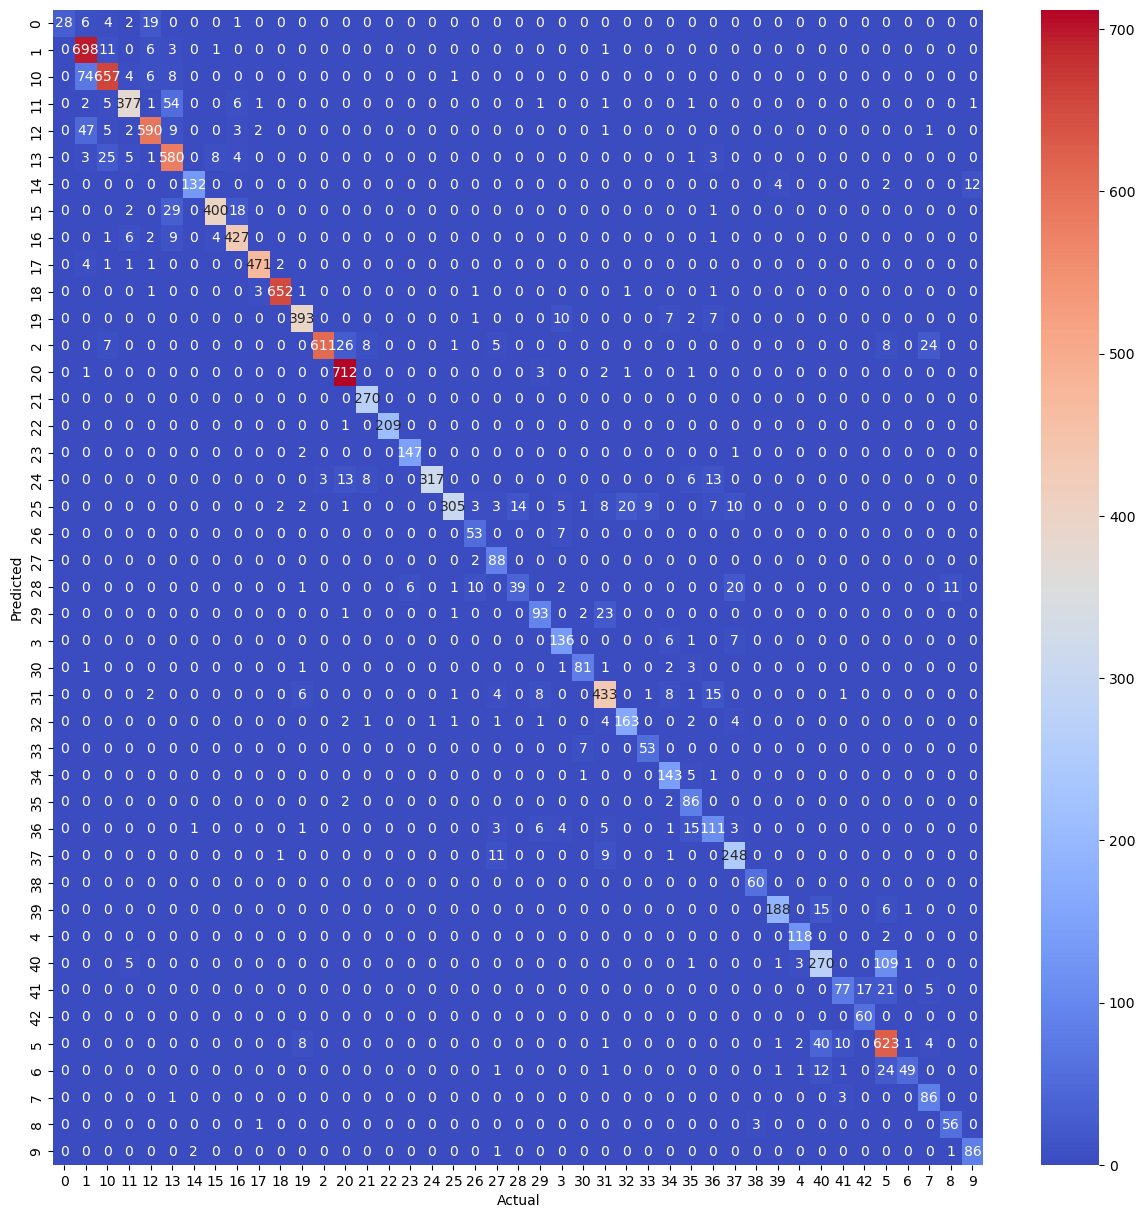

In [447]:

conf_mat = confusion_matrix(labels, predict)
plt.figure(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt = 'd', cmap = 'coolwarm', xticklabels= classnames, yticklabels=classnames)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()